# load dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()
# plt.rc('figure', dpi=120) # set good resolution

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# Check the versions are OK (both should be 2 or more)
print(tf.__version__)
print(keras.__version__)

2.9.2
2.9.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/ass3/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/My Drive/ass3/sign_mnist_test.csv')

In [7]:
print(df.info(),df.head(),df.shape)
print(test.info(),test.head(),test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230    

In [8]:
# check NAN value
print([i for i in np.sum(df.isna())])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
print(df.describe())


              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.325369    145.419377    148.500273    151.247714    153.546531   
std        7.374907     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max      200.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392    

### show the proportion of each label

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1160
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64


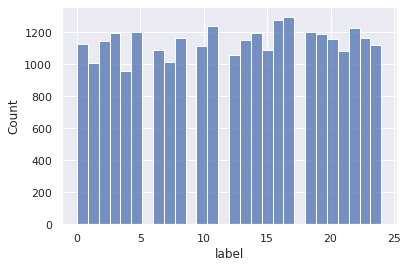

In [10]:
# the dataset only has one picture with label 200, it is a outlier
df['label'].value_counts()
df.drop(index = df[df['label']==200].index,inplace = True)
print(df['label'].value_counts().sort_index()
)
sns.histplot(df['label']) 


### split train set and validation set
### display one sample image of each class

(21963, 784) (5491, 784) (21963, 1) (5491, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[19, 47, 55, 65, 101, 114, 135, 138, 152, 154, 174, 204, 206, 225, 226, 230, 273, 306, 316, 323, 338, 349, 361, 362, 381, 392, 394, 410, 448, 490, 491, 492, 497, 510, 530, 563, 568, 587, 640, 645, 646, 658, 687, 698, 759, 766, 777, 779, 793, 840, 841, 896, 898, 899, 906, 907, 946, 962, 1001, 1033, 1071, 1084, 1091, 1106, 1216, 1221, 1223, 1288, 1327, 1332, 1351, 1359, 1382, 1395, 1462, 1478, 1518, 1527, 1632, 1691, 1714, 1722, 1793, 1827, 1846, 1848, 1869, 1913, 1942, 1967, 1977, 1989, 2001, 2041, 2048, 2054, 2058, 2063, 2077, 2103, 2107, 2123, 2131, 2196, 2235, 2254, 2292, 2306, 2307, 2330, 2354, 2413, 2439, 2502, 2514, 2536, 2556, 2571, 2593, 2599, 2634, 2639, 2646, 2679, 2714, 2726, 2761, 2781, 2796, 2809, 2856, 2871, 2874, 2889, 2898, 2993, 3001, 3022, 3028, 3049, 3050, 3078, 3108, 3174, 3177, 3220, 3225, 3247, 3283, 3286, 3297, 3298, 3351, 3369, 3442, 3

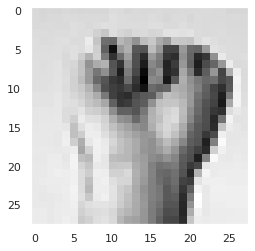

The label of image is  1


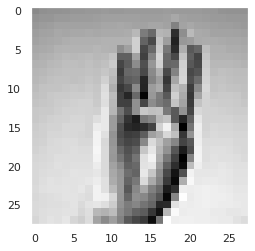

The label of image is  2


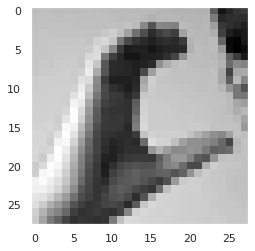

The label of image is  3


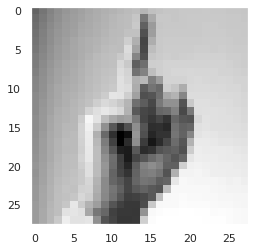

The label of image is  4


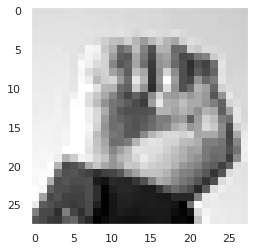

The label of image is  5


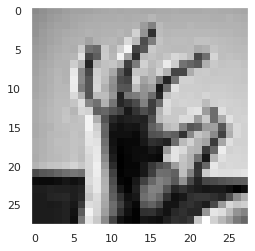

The label of image is  6


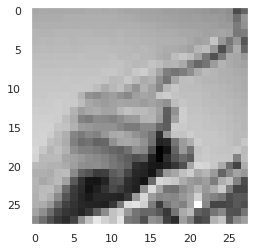

The label of image is  7


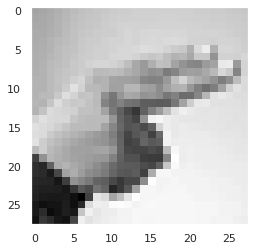

The label of image is  8


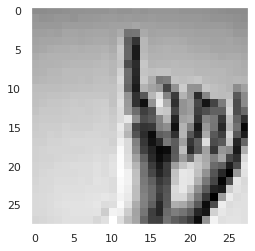

The label of image is  9


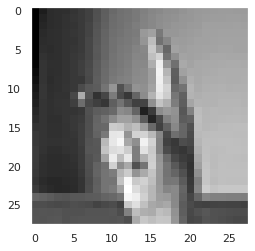

The label of image is  10


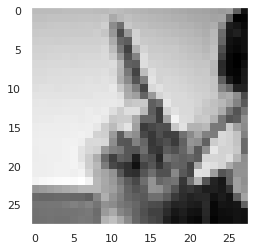

The label of image is  11


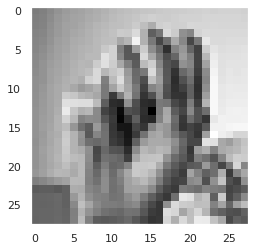

The label of image is  12


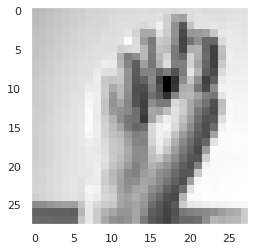

The label of image is  13


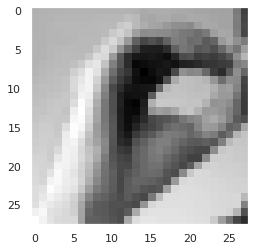

The label of image is  14


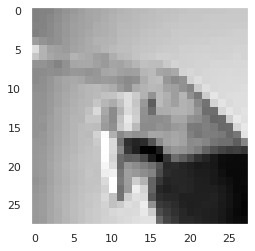

The label of image is  15


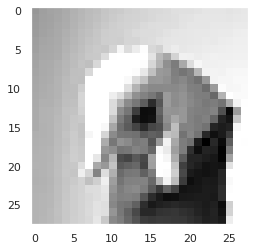

The label of image is  16


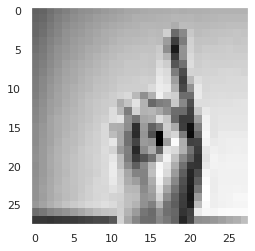

The label of image is  17


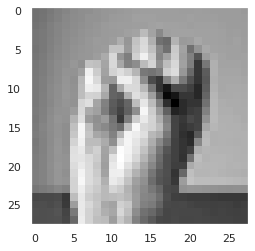

The label of image is  18


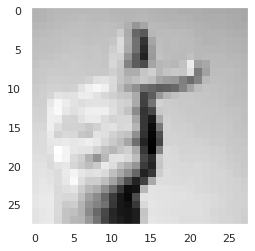

The label of image is  19


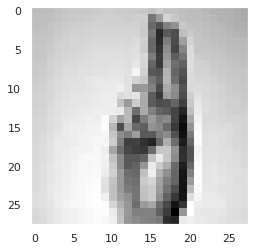

The label of image is  20


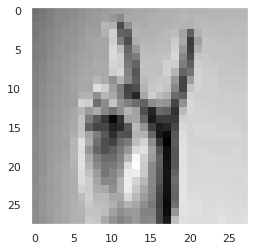

The label of image is  21


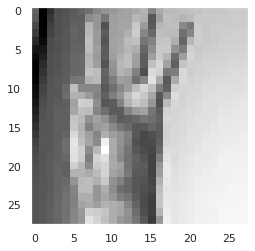

The label of image is  22


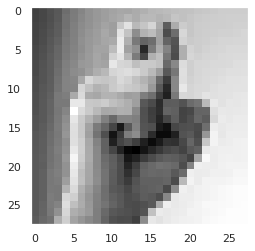

In [11]:
label = df['label']
# print(label)
X_train_ori, X_valid_ori = train_test_split(
    df, test_size =0.2, stratify = df['label']) #split train set and validation set

y_test = test.iloc[:,:1]
X_test = test.iloc[:,1:]/255.0
# print(X_test,y_test)
X_train, y_train = X_train_ori.iloc[:,1:]/255.0, X_train_ori.iloc[:,:1]
X_valid, y_valid = X_valid_ori.iloc[:,1:]/255.0, X_valid_ori.iloc[:,:1]
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)
# print(y_train.value_counts(),y_valid.value_counts())


# display one sample image of each class
class_names = [i for i in range(24)]
class_names.pop(9)
# class_names =  "，".join(str(i) for i in class_names)
print(class_names)

subset = []
print(df.index[df['label'] == 19].tolist())

for c in class_names:
#     print(c)
    a = df.index[df['label'] == c].tolist()
#     print(a)
    subset.append(a[0])
# subset = p.DataFrame(subset)
# print(subset)

print(subset[0])
j = 0
for i in subset:
    print('The label of image is ',j)
    plt.imshow(np.array(df.iloc[i,1:]).reshape(28,28), cmap='gray')
    plt.grid(False)
    plt.show()
    j = j+1

In [12]:
# X_train = np.array(X_train).reshape(21963,28,28)
# X_valid = np.array(X_valid).reshape(5491,28,28)
# X_test = np.array(X_test).reshape(7172,28,28)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

X_train = np.array(X_train).reshape(21963,28,28)
X_valid = np.array(X_valid).reshape(5491,28,28)
X_test = np.array(X_test).reshape(7172,28,28)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(21963, 784)
(21963, 1)
(5491, 784)
(5491, 1)
(7172, 784)
(7172, 1)
(21963, 28, 28)
(21963, 1)
(5491, 28, 28)
(5491, 1)
(7172, 28, 28)
(7172, 1)


# CNN

In [23]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_valid.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(21963, 28, 28, 1)
(21963, 1)
(5491, 28, 28, 1)
(5491, 1)
(7172, 28, 28, 1)
(7172, 1)


In [2]:
def creat_model():
  model = keras.models.Sequential()

  model.add(keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, activation = 'relu'))
  model.add(keras.layers.Dense(64, activation = 'relu'))
  model.add(keras.layers.Dense(25, activation = 'softmax'))

  model.summary()
  return model






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 32)         

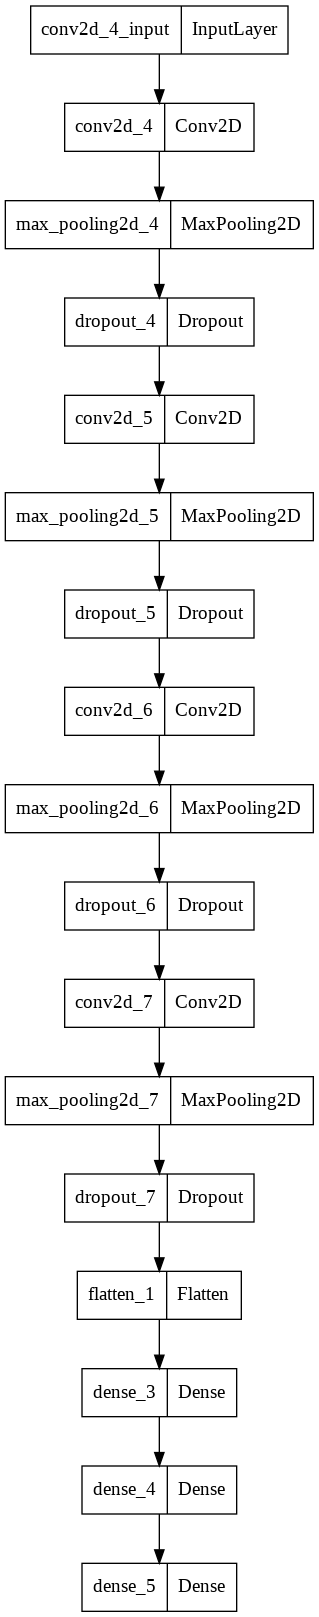

In [6]:

from keras.utils import plot_model
model_sgd_16 = creat_model()
plot_model(model_sgd_16)

In [25]:
import time
start = time.clock()
learning_rate = 0.1
decay_rate = learning_rate / 50
momentum = 0.8
model_sgd_16 = creat_model()
# Define Optimizer
optimizer = Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999)

# Compile Model
# model_sgd_16.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# # Epochs And Batch Size
# epochs = 100

# sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model_sgd_16.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy',mode="auto",patience=2)  
hist_sgd_16 = model_sgd_16.fit(X_train, y_train,
        epochs=50,         
        batch_size=64,
         verbose=2,
         validation_data=(X_valid, y_valid),
       callbacks=[early_stop]) 
time_sgd_16 = time.clock() - start
print(time_sgd_16)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Epoch 1/50
344/344 - 11s - loss: 3.2062 - accuracy: 0.0425 - val_loss: 3.1995 - val_accuracy: 0.0455 - 11s/epoch - 31ms/step
Epoch 2/50
344/344 - 2s - loss: 3.1848 - accuracy: 0.0476 - val_loss: 3.1752 - val_accuracy: 0.0492 - 2s/epoch - 4ms/step
Epoch 3/50
344/344 - 2s - loss: 3.1295 - accuracy: 0.0754 - val_loss: 3.0325 - val_accuracy: 0.1224 - 2s/epoch - 5ms/step
Epoch 4/50
344/344 - 2s - loss: 2.8688 - accuracy: 0.1446 - val_loss: 2.6196 - val_accuracy: 0.2176 - 2s/epoch - 5ms/step
Epoch 5/50
344/344 - 1s - loss: 2.5178 - accuracy: 0.2214 - val_loss: 2.2335 - val_accuracy: 0.3207 - 1s/epoch - 4ms/step
Epoch 6/50
344/344 - 2s - loss: 2.2038 - accuracy: 0.3016 - val_loss: 1.9034 - val_accuracy: 0.4081 - 2s/epoch - 5ms/step
Epoch 7/50
344/344 - 1s - loss: 1.9309 - accuracy: 0.3787 - val_loss: 1.6047 - val_accuracy: 0.4943 - 1s/epoch - 4ms/step
Epoch 8/50
344/344 - 2s - loss: 1.7110 - accuracy: 0.4378 - val_loss: 1.3832 - val_accuracy: 0.5715 - 2s/epoch - 5ms/step
Epoch 9/50
344/344 - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [26]:
metrics_cnn = pd.DataFrame(hist_sgd_16.history)
print("The model metrics of CNN is")
metrics_cnn

The model metrics of CNN is


,loss,accuracy,val_loss,val_accuracy
0,3.206224,0.042526,3.199499,0.045529
1,3.184753,0.047580,3.175214,0.049171
2,3.129486,0.075400,3.032473,0.122382
3,2.868762,0.144561,2.619614,0.217629
4,2.517812,0.221418,2.233482,0.320707
5,2.203836,0.301598,1.903441,0.408122
6,1.930910,0.378728,1.604687,0.494263
7,1.710988,0.437827,1.383195,0.571481
8,1.517800,0.492328,1.170086,0.632490
9,1.381940,0.536266,1.038447,0.679111


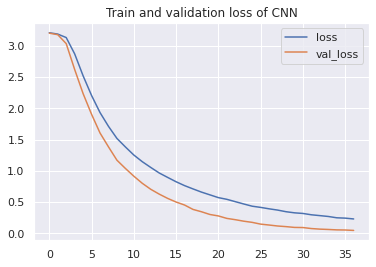

In [27]:
metrics_cnn[['loss','val_loss']].plot(title='Train and validation loss of CNN')
plt.show()

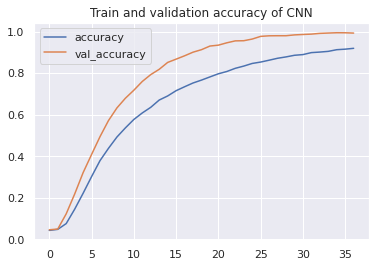

In [28]:
metrics_cnn[['accuracy','val_accuracy']].plot(title='Train and validation accuracy of CNN')
plt.show()

### CNN prediction

In [29]:
predictions1 = model_sgd_16.predict(X_test)
w=np.argmax(predictions1,axis=1)
print(w)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,w))

225/225 [==============================] - 1s 2ms/step
[ 6  5 10 ...  2  4  2]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      0.97      0.98       432
           2       0.94      1.00      0.97       310
           3       0.80      1.00      0.89       245
           4       0.90      0.99      0.94       498
           5       0.99      1.00      0.99       247
           6       0.92      0.94      0.93       348
           7       1.00      0.94      0.97       436
           8       0.94      0.97      0.95       288
          10       0.82      0.89      0.85       331
          11       1.00      1.00      1.00       209
          12       0.90      0.94      0.92       394
          13       0.93      0.81      0.87       291
          14       1.00      0.91      0.96       246
          15       0.98      1.00      0.99       347
          16       0.83      1.00      0.91       164
  

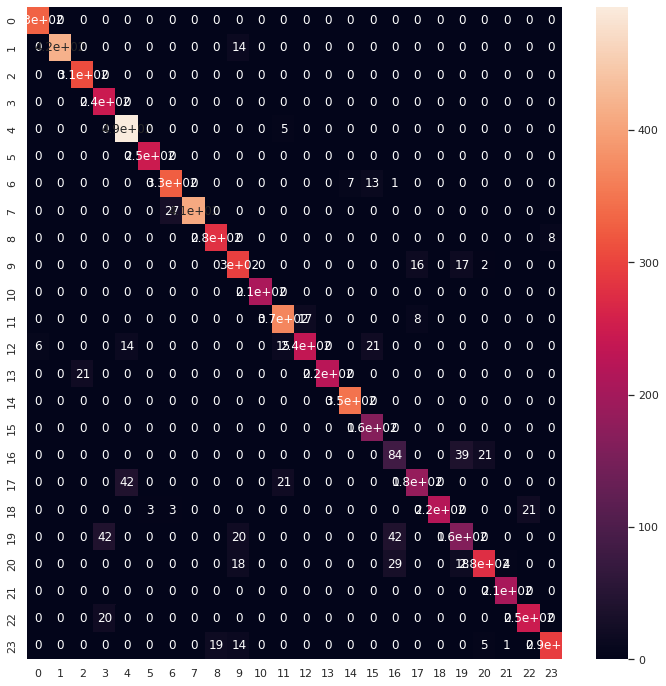

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,w),annot=True)
plt.show()

# VGG

In [7]:
model_vgg = keras.Sequential()
model_vgg.add(keras.applications.vgg16.VGG16(weights="imagenet",input_shape=(32,32,3),include_top=False))
model_vgg.add(keras.layers.Flatten())
model_vgg.add(keras.layers.Dense(512))
model_vgg.add(keras.layers.BatchNormalization())
model_vgg.add(keras.layers.LeakyReLU(0.2))
model_vgg.add(keras.layers.Dropout(0.3))

model_vgg.add(keras.layers.Dense(25,activation="softmax"))
model_vgg.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               

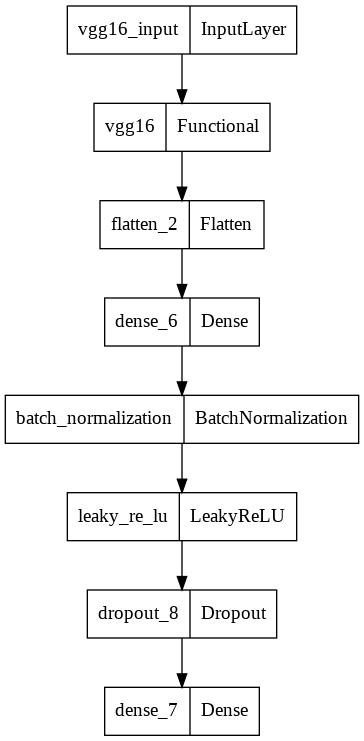

In [8]:
plot_model(model_vgg)

In [20]:
model_vgg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## VGG train

### The input of VGG need to be ar least 32*32 with three channels, I transfrom (32*32*1) picture to (32*32*3) by creating function change_image 

In [35]:
def change_image(df,n):
    temp = []
    for i in range(n):
        resize_image = tf.image.resize(images=df[i], size=(32,32))
        x = tf.image.grayscale_to_rgb(resize_image, name=None)
        temp.append(x)
    return temp


In [36]:
print(np.array(X_test).shape)
X_test2 = change_image(X_test,7172)
print(np.array(X_test2).shape)

(7172, 28, 28, 1)
(7172, 32, 32, 3)


In [37]:
print(np.array(X_train).shape)
X_train2 = change_image(X_train,21963)
print(np.array(X_train2).shape)

(21963, 28, 28, 1)
(21963, 32, 32, 3)


In [38]:
print(np.array(X_valid).shape)
X_val2 = change_image(X_valid,5491)
print(np.array(X_val2).shape)

(5491, 28, 28, 1)
(5491, 32, 32, 3)


In [39]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor="val_accuracy", mode="auto", 
                                        patience=5, restore_best_weights = True)
X_train2 = np.array(X_train2)
X_val2 = np.array(X_val2)
print(X_train2.shape,y_train.shape)
history_vgg = model_vgg.fit(X_train2, y_train, validation_data=(X_val2, y_valid),epochs = 10,shuffle = True,verbose = 1, callbacks = [earlystopping])

(21963, 32, 32, 3) (21963, 1)
Epoch 1/10
687/687 [==============================] - 24s 32ms/step - loss: 1.7406 - accuracy: 0.3972 - val_loss: 3.7332 - val_accuracy: 0.2023
Epoch 2/10
687/687 [==============================] - 21s 30ms/step - loss: 0.3505 - accuracy: 0.8828 - val_loss: 0.4440 - val_accuracy: 0.8210
Epoch 3/10
687/687 [==============================] - 21s 31ms/step - loss: 0.1382 - accuracy: 0.9574 - val_loss: 0.2142 - val_accuracy: 0.9222
Epoch 4/10
687/687 [==============================] - 21s 31ms/step - loss: 0.0842 - accuracy: 0.9742 - val_loss: 0.0296 - val_accuracy: 0.9913
Epoch 5/10
687/687 [==============================] - 21s 31ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0045 - val_accuracy: 0.9996
Epoch 6/10
687/687 [==============================] - 21s 31ms/step - loss: 0.0976 - accuracy: 0.9679 - val_loss: 0.0251 - val_accuracy: 0.9940
Epoch 7/10
687/687 [==============================] - 21s 31ms/step - loss: 0.0416 - accuracy: 0.9867 - va

In [40]:
metrics_vgg = pd.DataFrame(history_vgg.history)
print("The model metrics of VGG is")
metrics_vgg

The model metrics of VGG is


,loss,accuracy,val_loss,val_accuracy
0,1.740554,0.397213,3.733209,0.202331
1,0.350521,0.882757,0.443976,0.820980
2,0.138150,0.957428,0.214204,0.922236
3,0.084249,0.974184,0.029634,0.991258
4,0.057813,0.981970,0.004479,0.999636
5,0.097649,0.967946,0.025082,0.993990
6,0.041584,0.986705,0.021448,0.994719
7,0.038115,0.988116,1.060334,0.730650
8,0.021382,0.992715,0.005250,0.999818
9,0.056728,0.982607,0.056189,0.981606


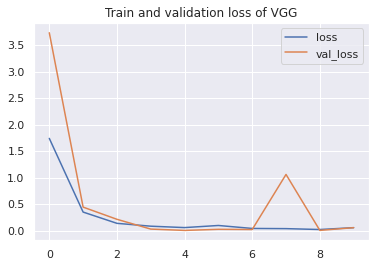

In [41]:
metrics_vgg[['loss','val_loss']].plot(title='Train and validation loss of VGG')
plt.show()

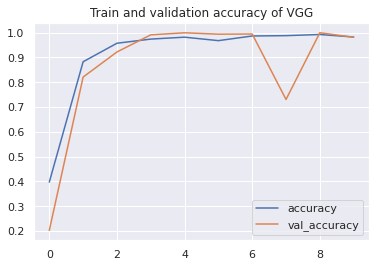

In [42]:
metrics_vgg[['accuracy','val_accuracy']].plot(title='Train and validation accuracy of VGG')
plt.show()

## VGG prediction

In [43]:
X_test2 = np.array(X_test2)
classes_x_vgg  =[]
predictions_vgg = model_vgg.predict(X_test2)

# for i in range(7172):
#   print(i)
#   predictions_vgg = model_vgg.predict((X_test2[i]).reshape(1,32,32,3))
#   classes_x_vgg.append(np.argmax(predictions_vgg,axis=1))
# print(classes_x_vgg)
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test,predictions_vgg))

225/225 [==============================] - 3s 12ms/step


In [44]:
vgg=np.argmax(predictions_vgg,axis=1)
print(classification_report(y_test,np.array(vgg)))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       331
           1       1.00      0.98      0.99       432
           2       0.93      1.00      0.96       310
           3       0.92      1.00      0.96       245
           4       1.00      0.86      0.92       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       0.78      1.00      0.87       436
           8       0.97      0.82      0.89       288
          10       0.92      0.98      0.95       331
          11       0.91      1.00      0.95       209
          12       0.84      0.77      0.80       394
          13       0.61      1.00      0.76       291
          14       1.00      1.00      1.00       246
          15       1.00      0.63      0.77       347
          16       0.95      1.00      0.98       164
          17       0.79      0.66      0.72       144
          18       0.78    

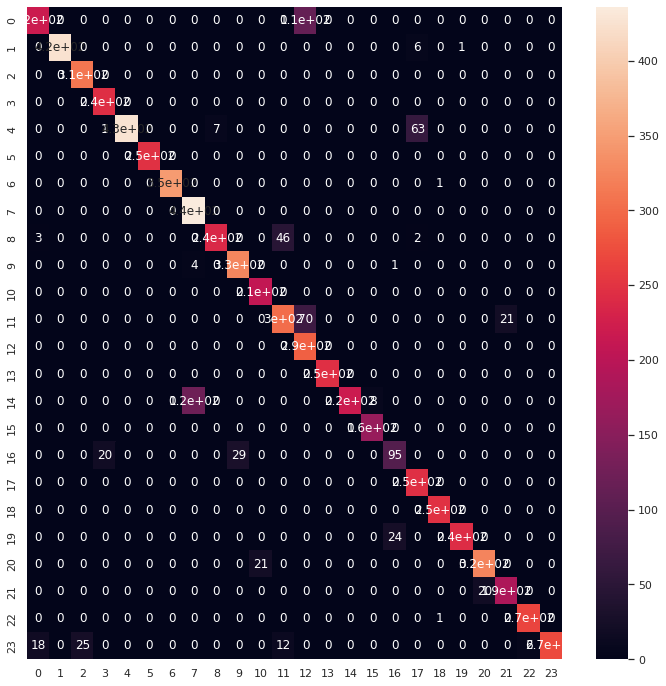

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,np.array(vgg).ravel()),annot=True)
plt.show()

In [78]:
from tabulate import tabulate
print(tabulate(confusion_matrix(y_test,np.array(vgg).ravel()),headers=['Pred']))

                                                                                                                    Pred
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --  ---  ---  ---  ---  ---  ---  ------
218    0    0    0    0    0    0    0    0    0    0    0  113    0    0    0   0    0    0    0    0    0    0       0
  0  425    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0    6    0    1    0    0    0       0
  0    0  310    0    0    0    0    0    0    0    0    0    0    0    0    0   0    0    0    0    0    0    0       0
  0    0    0  245    0    0    0    0    0    0    0    0    0    0    0    0   0    0    0    0    0    0    0       0
  0    0    0    1  427    0    0    0    7    0    0    0    0    0    0    0   0   63    0    0    0    0    0       0
  0    0    0    0    0  247    0    0    0    0    0    0    0    0    0    0   0    0    0    0    0    0    0       0
  0    0    0    0    0    0  34

# ResNet

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50

model_res = keras.Sequential()
# model_vgg.add(keras.applications.vgg16.VGG16(weights="imagenet",input_shape=(32,32,3),include_top=False))pooling = 'avg',
model_res.add(ResNet50(include_top = False,  weights = 'imagenet',input_shape=(32,32,3)))

model_res.add(keras.layers.Flatten())
model_res.add(keras.layers.Dense(512))
model_res.add(keras.layers.BatchNormalization())
model_res.add(keras.layers.LeakyReLU(0.2))
model_res.add(keras.layers.Dropout(0.3))

model_res.add(keras.layers.Dense(25,activation="softmax"))
# model_res.layers[0].trainable = False
model_res.summary()

# model = Sequential()

# model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
# model.add(Dense(10, activation = 'softmax'))

# Say not to train first layer (ResNet) model as it is already trained


94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               

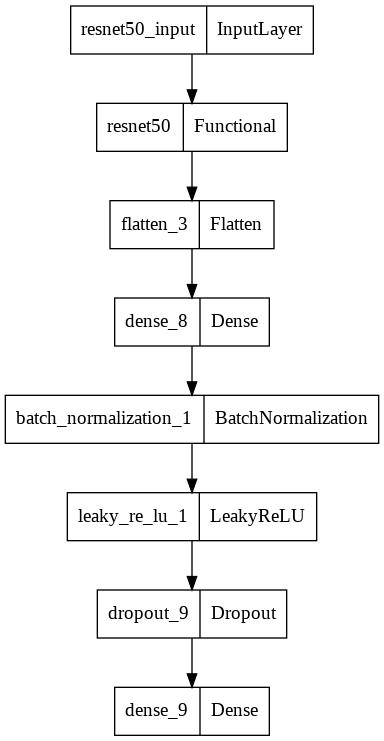

In [10]:
plot_model(model_res)

In [56]:
model_res.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor="val_accuracy", mode="auto", 
                                        patience=3, restore_best_weights = True)
X_train2 = np.array(X_train2)
X_val2 = np.array(X_val2)
print(X_train2.shape,y_train.shape)
history_res = model_res.fit(X_train2, y_train, validation_data=(X_val2, y_valid),epochs = 20,shuffle = True,verbose = 1, callbacks = [earlystopping])

(21963, 32, 32, 3) (21963, 1)
Epoch 1/20
687/687 [==============================] - 43s 53ms/step - loss: 0.5348 - accuracy: 0.8523 - val_loss: 2.0420 - val_accuracy: 0.4524
Epoch 2/20
687/687 [==============================] - 35s 51ms/step - loss: 0.1360 - accuracy: 0.9656 - val_loss: 0.6174 - val_accuracy: 0.8326
Epoch 3/20
687/687 [==============================] - 29s 42ms/step - loss: 0.0575 - accuracy: 0.9845 - val_loss: 0.2015 - val_accuracy: 0.9395
Epoch 4/20
687/687 [==============================] - 29s 42ms/step - loss: 0.0847 - accuracy: 0.9791 - val_loss: 0.0772 - val_accuracy: 0.9798
Epoch 5/20
687/687 [==============================] - 30s 44ms/step - loss: 0.0506 - accuracy: 0.9881 - val_loss: 1.6878 - val_accuracy: 0.6634
Epoch 6/20
687/687 [==============================] - 30s 43ms/step - loss: 0.0656 - accuracy: 0.9842 - val_loss: 0.1863 - val_accuracy: 0.9543
Epoch 7/20
687/687 [==============================] - 29s 42ms/step - loss: 0.0314 - accuracy: 0.9932 - va

In [58]:
metrics_res = pd.DataFrame(history_res.history)
print("The model metrics of ResNet is")
metrics_res

The model metrics of ResNet is


,loss,accuracy,val_loss,val_accuracy
0,0.534822,0.852297,2.041957,0.452377
1,0.136034,0.965624,0.617398,0.832635
2,0.057490,0.984474,0.201534,0.939537
3,0.084681,0.979101,0.077210,0.979785
4,0.050632,0.988116,1.687768,0.663449
5,0.065593,0.984201,0.186270,0.954289
6,0.031437,0.993216,2.471261,0.553087


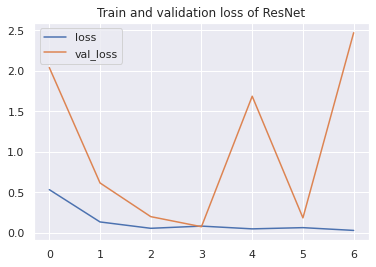

In [59]:
metrics_res[['loss','val_loss']].plot(title='Train and validation loss of ResNet')
plt.show()

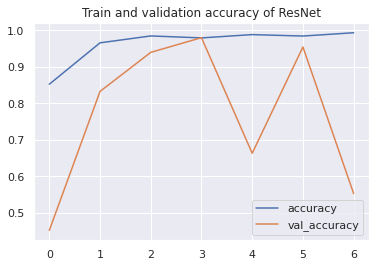

In [60]:
metrics_res[['accuracy','val_accuracy']].plot(title='Train and validation accuracy of ResNet')
plt.show()

## ResNet prediction

In [61]:
print(X_test2)
X_test2 = np.array(X_test2)


[[[[0.58431375 0.58431375 0.58431375]
   [0.58431375 0.58431375 0.58431375]
   [0.58700985 0.58700985 0.58700985]
   ...
   [0.5882353  0.5882353  0.5882353 ]
   [0.58750004 0.58750004 0.58750004]
   [0.58431375 0.58431375 0.58431375]]

  [[0.58750004 0.58750004 0.58750004]
   [0.58750004 0.58750004 0.58750004]
   [0.58800554 0.58800554 0.58800554]
   ...
   [0.5904259  0.5904259  0.5904259 ]
   [0.5886949  0.5886949  0.5886949 ]
   [0.5906863  0.5906863  0.5906863 ]]

  [[0.5882353  0.5882353  0.5882353 ]
   [0.5904259  0.5904259  0.5904259 ]
   [0.5909314  0.5909314  0.5909314 ]
   ...
   [0.5917739  0.5917739  0.5917739 ]
   [0.5916667  0.5916667  0.5916667 ]
   [0.594853   0.594853   0.594853  ]]

  ...

  [[0.2767157  0.2767157  0.2767157 ]
   [0.27771142 0.27771142 0.27771142]
   [0.29361215 0.29361215 0.29361215]
   ...
   [0.44731924 0.44731924 0.44731924]
   [0.44865197 0.44865197 0.44865197]
   [0.45661765 0.45661765 0.45661765]]

  [[0.29093137 0.29093137 0.29093137]
   [0.2

In [62]:
predictions_vres = model_res.evaluate(X_test2,y_test)

225/225 [==============================] - 3s 15ms/step - loss: 0.2647 - accuracy: 0.9360


In [63]:
predictions_vres1 = model_res.predict(X_test2)

225/225 [==============================] - 3s 12ms/step


In [64]:
res=np.argmax(predictions_vres1,axis=1)
print(res)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,res))

[ 6  5 10 ...  2  4  2]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       0.99      0.98      0.99       245
           4       0.97      0.94      0.95       498
           5       1.00      0.99      1.00       247
           6       0.86      0.82      0.84       348
           7       0.81      1.00      0.89       436
           8       1.00      0.75      0.86       288
          10       0.99      0.93      0.96       331
          11       0.99      1.00      1.00       209
          12       0.88      0.92      0.90       394
          13       0.92      0.83      0.88       291
          14       0.98      0.99      0.99       246
          15       1.00      0.97      0.98       347
          16       0.95      1.00      0.97       164
          17       0.97      0.92      0.94       144
   

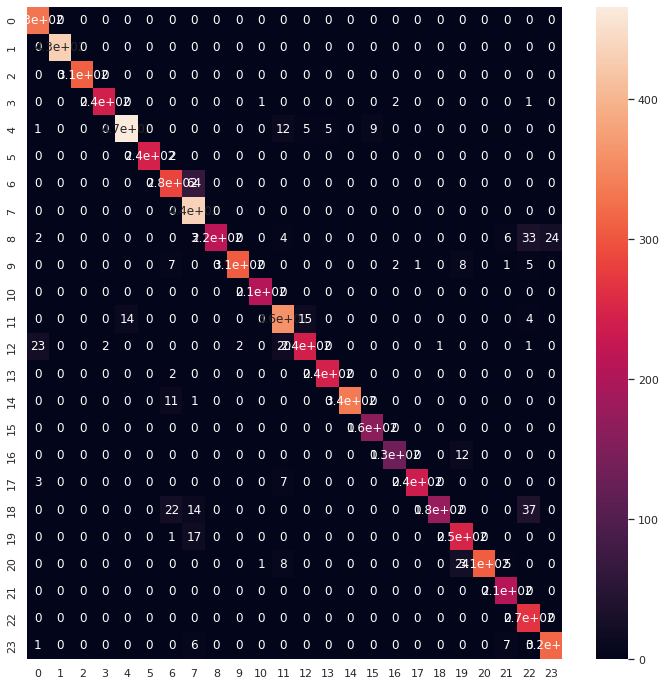

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,np.array(res).ravel()),annot=True)
plt.show()

In [79]:
print(tabulate(confusion_matrix(y_test,np.array(res).ravel()),headers=['Pred']))

                                                                                                                     Pred
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ------
331    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0  432    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0  310    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0    0  241    0    0    0    0    0    0    1    0    0    0    0    0    2    0    0    0    0    0    1       0
  1    0    0    0  466    0    0    0    0    0    0   12    5    5    0    9    0    0    0    0    0    0    0       0
  0    0    0    0    0  245    2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0    0    0    0 

# InceptionV3

### The input of InceptionV3 need to be ar least 75*75 with three channels, I transfrom (32* 32 *1) picture to (75* 75 *3) by creating function change_image 

In [67]:
def change_image75(df,n):
    temp = []
    for i in range(n):
        resize_image = tf.image.resize(images=df[i], size=(75,75))
        x = tf.image.grayscale_to_rgb(resize_image, name=None)
        temp.append(x)
    return temp


In [68]:
print(np.array(X_test).shape)
X_test75 = change_image75(X_test,7172)
print(np.array(X_test75).shape)

(7172, 28, 28, 1)
(7172, 75, 75, 3)


In [76]:
print(np.array(X_train).shape)
X_train75 = change_image75(X_train,21963)
print(np.array(X_train75).shape)

(21963, 28, 28, 1)
(21963, 75, 75, 3)


In [77]:
print(np.array(X_valid).shape)
X_val75 = change_image75(X_valid,5491)
print(np.array(X_val75).shape)

(5491, 28, 28, 1)
(5491, 75, 75, 3)


In [11]:
from tensorflow.keras.applications import InceptionV3
# tf.keras.applications.InceptionV3(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )
model_inc = keras.Sequential()
# model_vgg.add(keras.applications.vgg16.VGG16(weights="imagenet",input_shape=(32,32,3),include_top=False))pooling = 'avg',
model_inc.add(InceptionV3(include_top = False,  weights = 'imagenet',input_shape=(75,75,3)))

model_inc.add(keras.layers.Flatten())
model_inc.add(keras.layers.Dense(512))
model_inc.add(keras.layers.BatchNormalization())
model_inc.add(keras.layers.LeakyReLU(0.2))
model_inc.add(keras.layers.Dropout(0.3))

model_inc.add(keras.layers.Dense(25,activation="softmax"))
# model_res.layers[0].trainable = False
model_inc.summary()

# model = Sequential()

# model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
# model.add(Dense(10, activation = 'softmax'))

# Say not to train first layer (ResNet) model as it is already trained


87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_96 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_10 (Dropout)        (None, 512)               

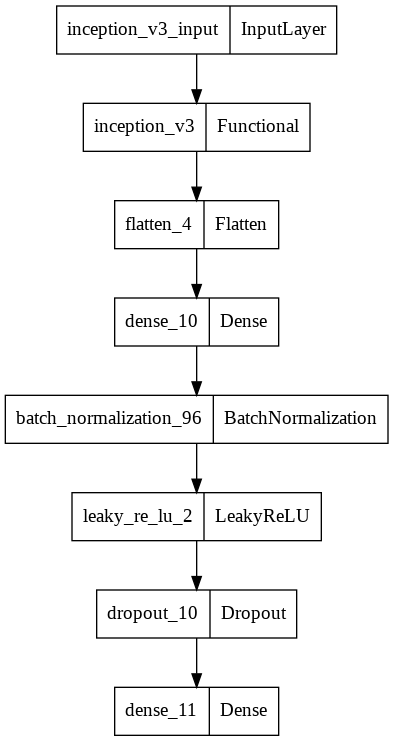

In [12]:
plot_model(model_inc)

In [81]:
model_inc.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [82]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor="val_accuracy", mode="auto", 
                                        patience=3, restore_best_weights = True)
X_train75 = np.array(X_train75)
X_val75 = np.array(X_val75)
print(X_train75.shape,y_train.shape)
history_inc = model_inc.fit(X_train75, y_train, validation_data=(X_val75, y_valid),epochs = 20,shuffle = True,verbose = 1, callbacks = [earlystopping])

(21963, 75, 75, 3) (21963, 1)
Epoch 1/20
687/687 [==============================] - 50s 60ms/step - loss: 0.6858 - accuracy: 0.8328 - val_loss: 0.3325 - val_accuracy: 0.9080
Epoch 2/20
687/687 [==============================] - 36s 53ms/step - loss: 0.1203 - accuracy: 0.9698 - val_loss: 0.0372 - val_accuracy: 0.9889
Epoch 3/20
687/687 [==============================] - 37s 54ms/step - loss: 0.0674 - accuracy: 0.9838 - val_loss: 0.0601 - val_accuracy: 0.9845
Epoch 4/20
687/687 [==============================] - 37s 54ms/step - loss: 0.0286 - accuracy: 0.9932 - val_loss: 1.0427e-04 - val_accuracy: 1.0000
Epoch 5/20
687/687 [==============================] - 37s 54ms/step - loss: 0.0828 - accuracy: 0.9801 - val_loss: 0.0163 - val_accuracy: 0.9962
Epoch 6/20
687/687 [==============================] - 37s 54ms/step - loss: 0.0381 - accuracy: 0.9916 - val_loss: 0.0998 - val_accuracy: 0.9732
Epoch 7/20
687/687 [==============================] - 38s 55ms/step - loss: 0.0393 - accuracy: 0.9909 

In [84]:
metrics_inc = pd.DataFrame(history_inc.history)
print("The model metrics of InceptionV3 is")
metrics_inc

The model metrics of InceptionV3 is


,loss,accuracy,val_loss,val_accuracy
0,0.685796,0.832764,0.332545,0.908031
1,0.120305,0.969813,0.037153,0.988891
2,0.067446,0.983791,0.060068,0.984520
3,0.028633,0.993170,0.000104,1.000000
4,0.082829,0.980103,0.016307,0.996176
5,0.038081,0.991622,0.099758,0.973229
6,0.039346,0.990894,0.000067,1.000000


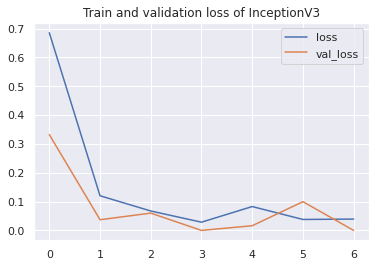

In [85]:
metrics_inc[['loss','val_loss']].plot(title='Train and validation loss of InceptionV3')
plt.show()

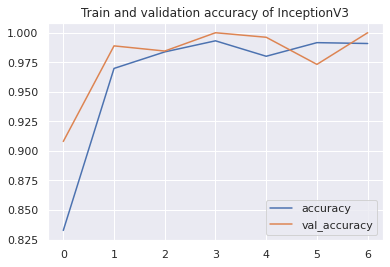

In [86]:
metrics_inc[['accuracy','val_accuracy']].plot(title='Train and validation accuracy of InceptionV3')
plt.show()

## InceptionV3 prediction

In [83]:
print(X_test75)
X_test75 = np.array(X_test75)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [87]:
predictions_inc = model_inc.predict(X_test75)

225/225 [==============================] - 5s 18ms/step


In [88]:
inc=np.argmax(predictions_inc,axis=1)
print(inc)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,inc))

[ 6  5 10 ...  2  4  2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       0.97      1.00      0.99       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       1.00      1.00      1.00       144
   

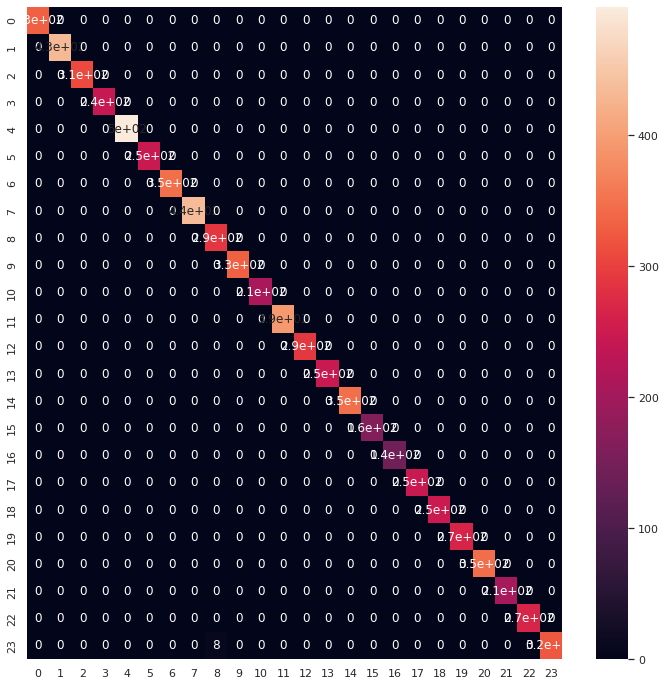

In [89]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,np.array(inc).ravel()),annot=True)
plt.show()

In [90]:
from tabulate import tabulate
print(tabulate(confusion_matrix(y_test,np.array(inc).ravel()),headers=['Pred']))

                                                                                                                     Pred
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ------
331    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0  432    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0  310    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0    0  245    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0    0    0  498    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0    0    0    0  247    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0       0
  0    0    0    0    0 